<a href="https://colab.research.google.com/github/yomnadahab770/FinalNtiProject/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline as ImbPipeline
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_recall_curve
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import ydata_profiling as yp
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler

# Read Data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/train (2).csv')

Set the color palette

In [ ]:
my_palette = ["#E63946", "#F1FAEE", "#A8DADC", "#457B9D", "#1D3557"]
sns.set_palette(my_palette)

### `Initial data inspection `

In [ ]:
df = pd.read_csv('/content/train (2).csv')
df

id  age          job   marital  education default  balance  \
0            0   42   technician   married  secondary      no        7   
1            1   38  blue-collar   married  secondary      no      514   
2            2   36  blue-collar   married  secondary      no      602   
3            3   27      student    single  secondary      no       34   
4            4   26   technician   married  secondary      no      889   
...        ...  ...          ...       ...        ...     ...      ...   
749995  749995   29     services    single  secondary      no     1282   
749996  749996   69      retired  divorced   tertiary      no      631   
749997  749997   50  blue-collar   married  secondary      no      217   
749998  749998   32   technician   married  secondary      no     -274   
749999  749999   42   technician   married  secondary      no     1559   

       housing loan   contact  day month  duration  campaign  pdays  previous  \
0           no   no  cellular   25   aug       117         3     -1         0   
1           no   no   unknown   18   jun       185         1     -1         0   
2          yes   no   unknown   14   may       111         2     -1         0   
3          yes   no   unknown   28   may        10         2     -1         0   
4          yes   no  cellular    3   feb       902         1     -1         0   
...        ...  ...       ...  ...   ...       ...       ...    ...       ...   
749995      no  yes   unknown    4   jul      1006         2     -1         0   
749996      no   no  cellular   19   aug        87         1     -1         0   
749997     yes   no  cellular   17   apr       113         1     -1         0   
749998      no   no  cellular   26   aug       108         6     -1         0   
749999      no   no  cellular    4   aug       143         1      1         7   

       poutcome  y  
0       unknown  0  
1       unknown  0  
2       unknown  0  
3       unknown  0  
4       unknown  1  
...         ... ..  
749995  unknown  1  
749996  unknown  0  
749997  unknown  0  
749998  unknown  0  
749999  failure  0  

[750000 rows x 18 columns]

  Display last 5 rows

In [ ]:
df.tail()

id  age          job   marital  education default  balance  \
749995  749995   29     services    single  secondary      no     1282   
749996  749996   69      retired  divorced   tertiary      no      631   
749997  749997   50  blue-collar   married  secondary      no      217   
749998  749998   32   technician   married  secondary      no     -274   
749999  749999   42   technician   married  secondary      no     1559   

       housing loan   contact  day month  duration  campaign  pdays  previous  \
749995      no  yes   unknown    4   jul      1006         2     -1         0   
749996      no   no  cellular   19   aug        87         1     -1         0   
749997     yes   no  cellular   17   apr       113         1     -1         0   
749998      no   no  cellular   26   aug       108         6     -1         0   
749999      no   no  cellular    4   aug       143         1      1         7   

       poutcome  y  
749995  unknown  1  
749996  unknown  0  
749997  unknown  0  
749998  unknown  0  
749999  failure  0

Display a sample of the dataset

In [ ]:
df.sample(10)

id  age          job   marital  education default  balance  \
586665  586665   41       admin.  divorced  secondary      no      528   
150431  150431   50   technician  divorced  secondary      no     -124   
739083  739083   32   management    single   tertiary      no      837   
339460  339460   27      student    single   tertiary      no     1521   
360153  360153   35      unknown   married    unknown      no      708   
397002  397002   35       admin.   married  secondary      no     2658   
74193    74193   50  blue-collar  divorced  secondary      no     1716   
172849  172849   53   technician   married  secondary      no     -133   
27110    27110   36     services   married  secondary      no      657   
81184    81184   28   technician    single   tertiary      no      870   

       housing loan    contact  day month  duration  campaign  pdays  \
586665      no   no  telephone   14   may       123         1     -1   
150431      no  yes   cellular   27   aug       129         4     -1   
739083     yes   no   cellular   14   may        15        10     -1   
339460      no   no   cellular    5   feb       362         1     -1   
360153      no   no   cellular   14   sep       619         1     -1   
397002     yes  yes   cellular   21   nov        77         3     -1   
74193      yes   no   cellular    7   apr       226         1     -1   
172849      no   no   cellular    7   aug       128         2     -1   
27110      yes   no  telephone   20   apr        16         3    328   
81184       no   no   cellular    7   jul       391         4     -1   

        previous poutcome  y  
586665         0  unknown  0  
150431         0  unknown  0  
739083         0  unknown  0  
339460         0  unknown  0  
360153         0  unknown  0  
397002         0  unknown  0  
74193          0  unknown  0  
172849         0  unknown  0  
27110          3  failure  0  
81184          0  unknown  1

Display the shape of the data

In [ ]:
df.shape

(750000, 18)

Display columns' names

In [ ]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

Information about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


Data description

In [ ]:
#numerical columns
df.describe()

id       age   balance       day  duration  campaign     pdays  \
count 750000.00 750000.00 750000.00 750000.00 750000.00 750000.00 750000.00   
mean  374999.50     40.93   1204.07     16.12    256.23      2.58     22.41   
std   216506.50     10.10   2836.10      8.25    272.56      2.72     77.32   
min        0.00     18.00  -8019.00      1.00      1.00      1.00     -1.00   
25%   187499.75     33.00      0.00      9.00     91.00      1.00     -1.00   
50%   374999.50     39.00    634.00     17.00    133.00      2.00     -1.00   
75%   562499.25     48.00   1390.00     21.00    361.00      3.00     -1.00   
max   749999.00     95.00  99717.00     31.00   4918.00     63.00    871.00   

       previous         y  
count 750000.00 750000.00  
mean       0.30      0.12  
std        1.34      0.33  
min        0.00      0.00  
25%        0.00      0.00  
50%        0.00      0.00  
75%        0.00      0.00  
max      200.00      1.00

In [ ]:
#categorical columns
df.describe(include='object')

job  marital  education default housing    loan   contact  \
count       750000   750000     750000  750000  750000  750000    750000   
unique          12        3          4       2       2       2         3   
top     management  married  secondary      no     yes      no  cellular   
freq        175541   480759     401683  737151  411288  645023    486655   

         month poutcome  
count   750000   750000  
unique      12        4  
top        may  unknown  
freq    228411   672450

In [ ]:
df['y'].value_counts()

y
0    659512
1     90488
Name: count, dtype: int64

In [ ]:
(df['y'].value_counts(normalize=True)*100).round(2)

y
0   87.93
1   12.07
Name: proportion, dtype: float64

# `Data cleaning `

Split columns into  numerical and categorical

In [ ]:
df.drop('id', axis=1, inplace=True)
df

age          job   marital  education default  balance housing loan  \
0        42   technician   married  secondary      no        7      no   no   
1        38  blue-collar   married  secondary      no      514      no   no   
2        36  blue-collar   married  secondary      no      602     yes   no   
3        27      student    single  secondary      no       34     yes   no   
4        26   technician   married  secondary      no      889     yes   no   
...     ...          ...       ...        ...     ...      ...     ...  ...   
749995   29     services    single  secondary      no     1282      no  yes   
749996   69      retired  divorced   tertiary      no      631      no   no   
749997   50  blue-collar   married  secondary      no      217     yes   no   
749998   32   technician   married  secondary      no     -274      no   no   
749999   42   technician   married  secondary      no     1559      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  y  
0       cellular   25   aug       117         3     -1         0  unknown  0  
1        unknown   18   jun       185         1     -1         0  unknown  0  
2        unknown   14   may       111         2     -1         0  unknown  0  
3        unknown   28   may        10         2     -1         0  unknown  0  
4       cellular    3   feb       902         1     -1         0  unknown  1  
...          ...  ...   ...       ...       ...    ...       ...      ... ..  
749995   unknown    4   jul      1006         2     -1         0  unknown  1  
749996  cellular   19   aug        87         1     -1         0  unknown  0  
749997  cellular   17   apr       113         1     -1         0  unknown  0  
749998  cellular   26   aug       108         6     -1         0  unknown  0  
749999  cellular    4   aug       143         1      1         7  failure  0  

[750000 rows x 17 columns]

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

Remove spaces into categorical columns

In [ ]:
for col in categorical_columns:
    df[col] = df[col].str.strip()

Set dataFrame into lowercase

In [ ]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df

id  age          job  marital  education default  balance housing  \
0          0   42   technician  married  secondary      no        7      no   
1          1   38  blue-collar  married  secondary      no      514      no   
2          2   36  blue-collar  married  secondary      no      602     yes   
3          3   27      student   single  secondary      no       34     yes   
4          4   26   technician  married  secondary      no      889     yes   
...      ...  ...          ...      ...        ...     ...      ...     ...   
96826  96826   35  blue-collar  married  secondary      no    -1038     yes   
96827  96827   34       admin.   single  secondary      no      459      no   
96828  96828   46   management  married   tertiary      no     3452      no   
96829  96829   27   technician   single   tertiary      no      446     yes   
96830  96830   53   technician  married   tertiary      no    -1379     yes   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  \
0       no  cellular   25   aug    117.00      3.00  -1.00      0.00  unknown   
1       no   unknown   18   jun    185.00      1.00  -1.00      0.00  unknown   
2       no   unknown   14   may    111.00      2.00  -1.00      0.00  unknown   
3       no   unknown   28   may     10.00      2.00  -1.00      0.00  unknown   
4       no  cellular    3   feb    902.00      1.00  -1.00      0.00  unknown   
...    ...       ...  ...   ...       ...       ...    ...       ...      ...   
96826   no   unknown   20   jun     77.00     10.00  -1.00      0.00  unknown   
96827  yes  cellular    4   feb    108.00      1.00  -1.00      0.00  unknown   
96828   no  cellular    6   aug    113.00      2.00  -1.00      0.00  unknown   
96829  yes  cellular    4   may     87.00      3.00  -1.00      0.00  unknown   
96830  yes   unknown   16   NaN       NaN       NaN    NaN       NaN      NaN   

         y  
0     0.00  
1     0.00  
2     0.00  
3     0.00  
4     1.00  
...    ...  
96826 0.00  
96827 0.00  
96828 0.00  
96829 0.00  
96830  NaN  

[96831 rows x 18 columns]

In [ ]:
y.unique()

array([0, 1])

Check for duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

Check for null values

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df = df.dropna()


In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

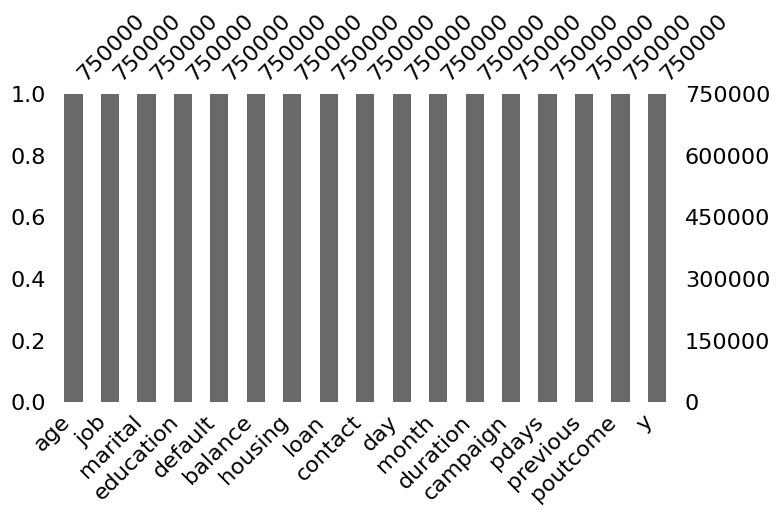

In [ ]:
msno.bar(df, figsize=(8, 4))
plt.show()

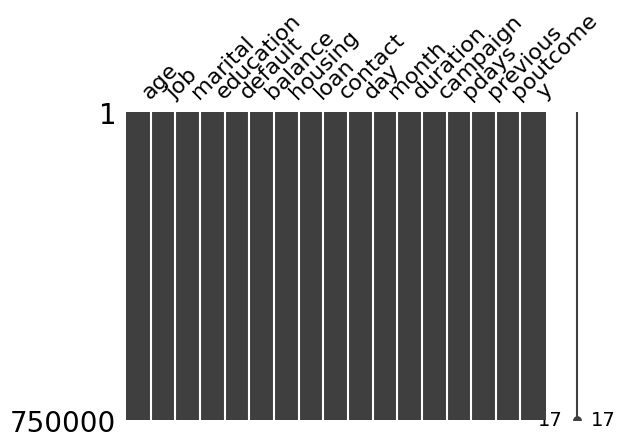

In [ ]:
msno.matrix(df, figsize=(6, 4))
plt.show()

Check for outliers

In [ ]:
outlier = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier[col] = len(outliers)

for col, count in outlier.items():
    print(f"Number of outliers in {col}: {count}")

Number of outliers in age: 4903
Number of outliers in balance: 57745
Number of outliers in day: 0
Number of outliers in duration: 46118
Number of outliers in campaign: 40686
Number of outliers in pdays: 77566
Number of outliers in previous: 77569
Number of outliers in y: 90488


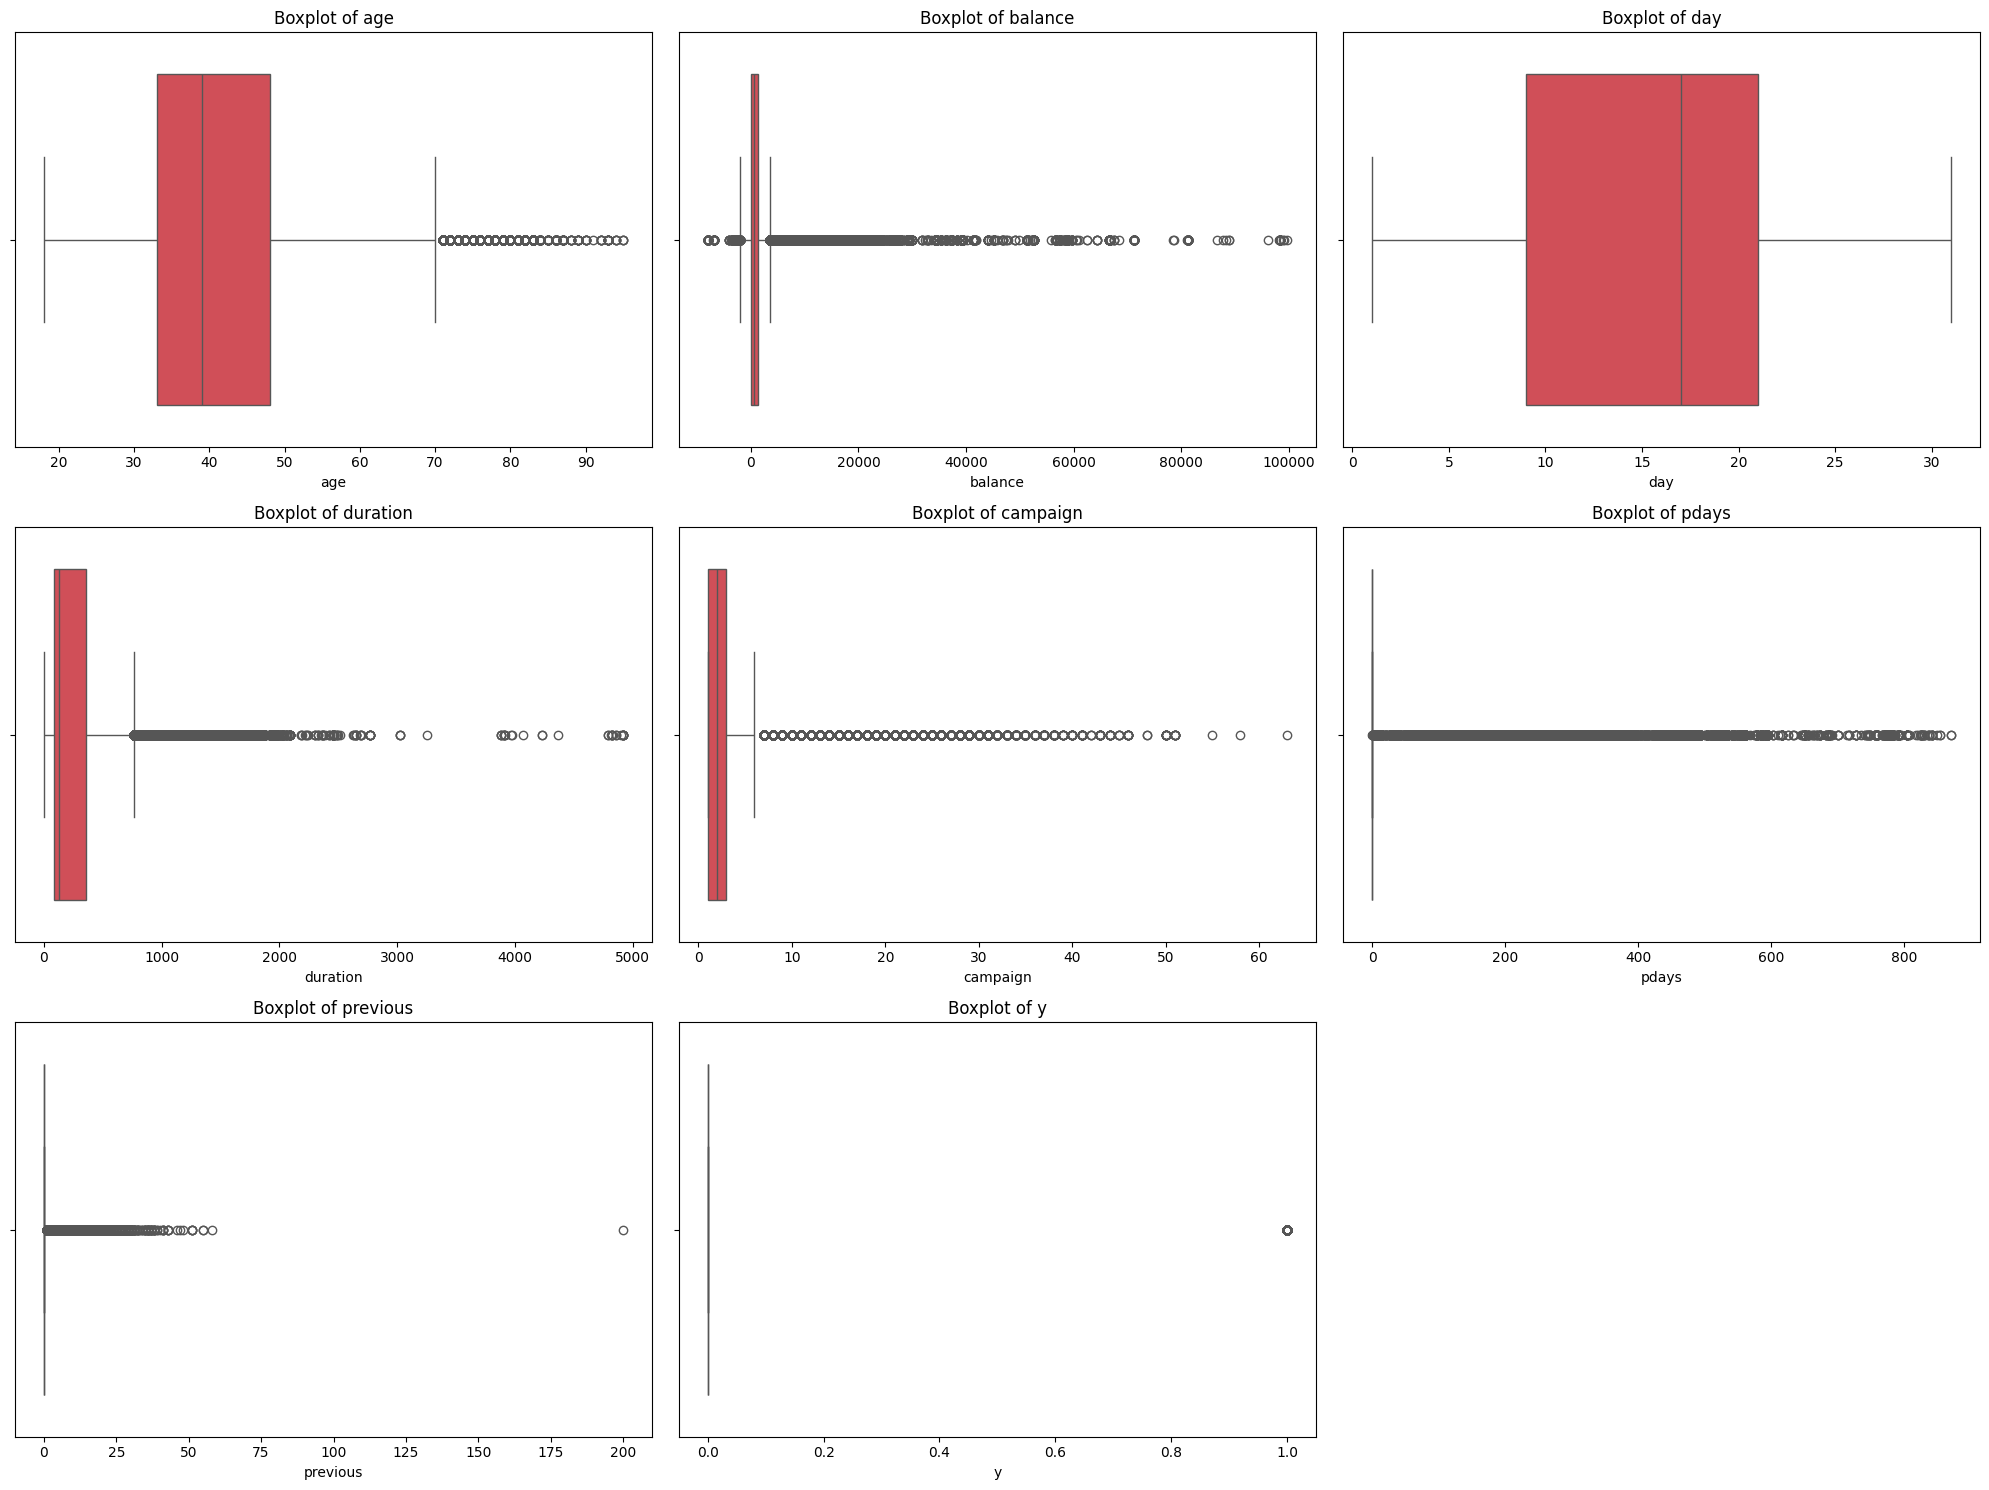

In [ ]:

plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


# `EDA`

In [ ]:
profile = yp.ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 17/17 [00:23<00:00,  1.37s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

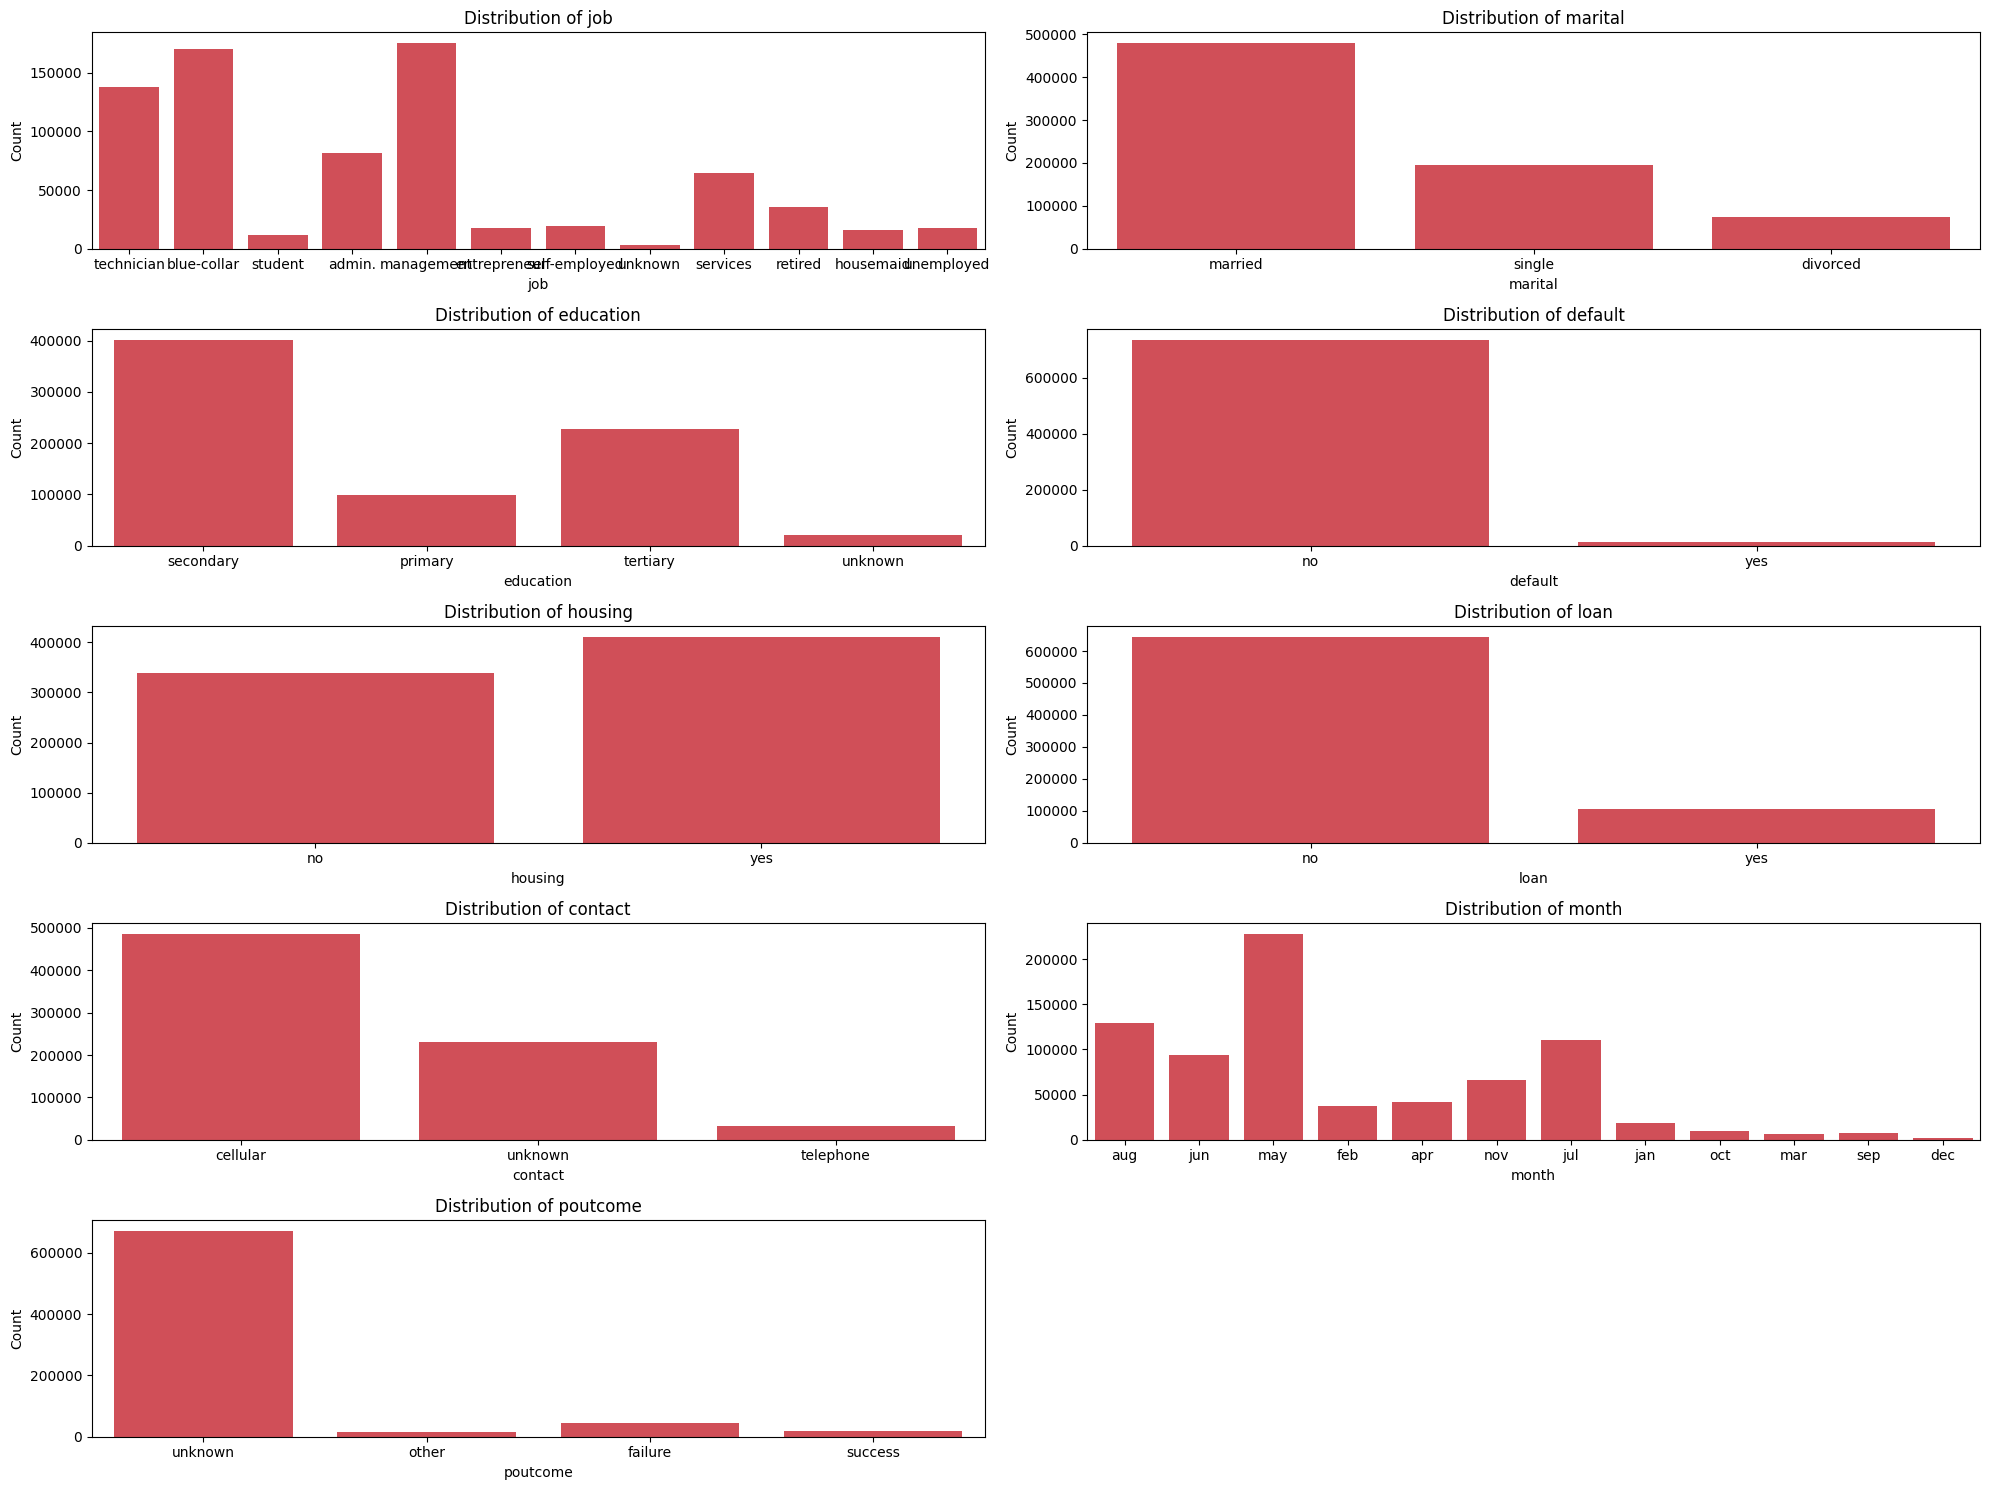

In [ ]:
plt.figure(figsize=(20,15))

for i, col in enumerate(categorical_columns):
  plt.subplot(5, 2, i+1)
  sns.countplot(x=col, data=df)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.tight_layout()


plt.show()

Distribution of numerical columns

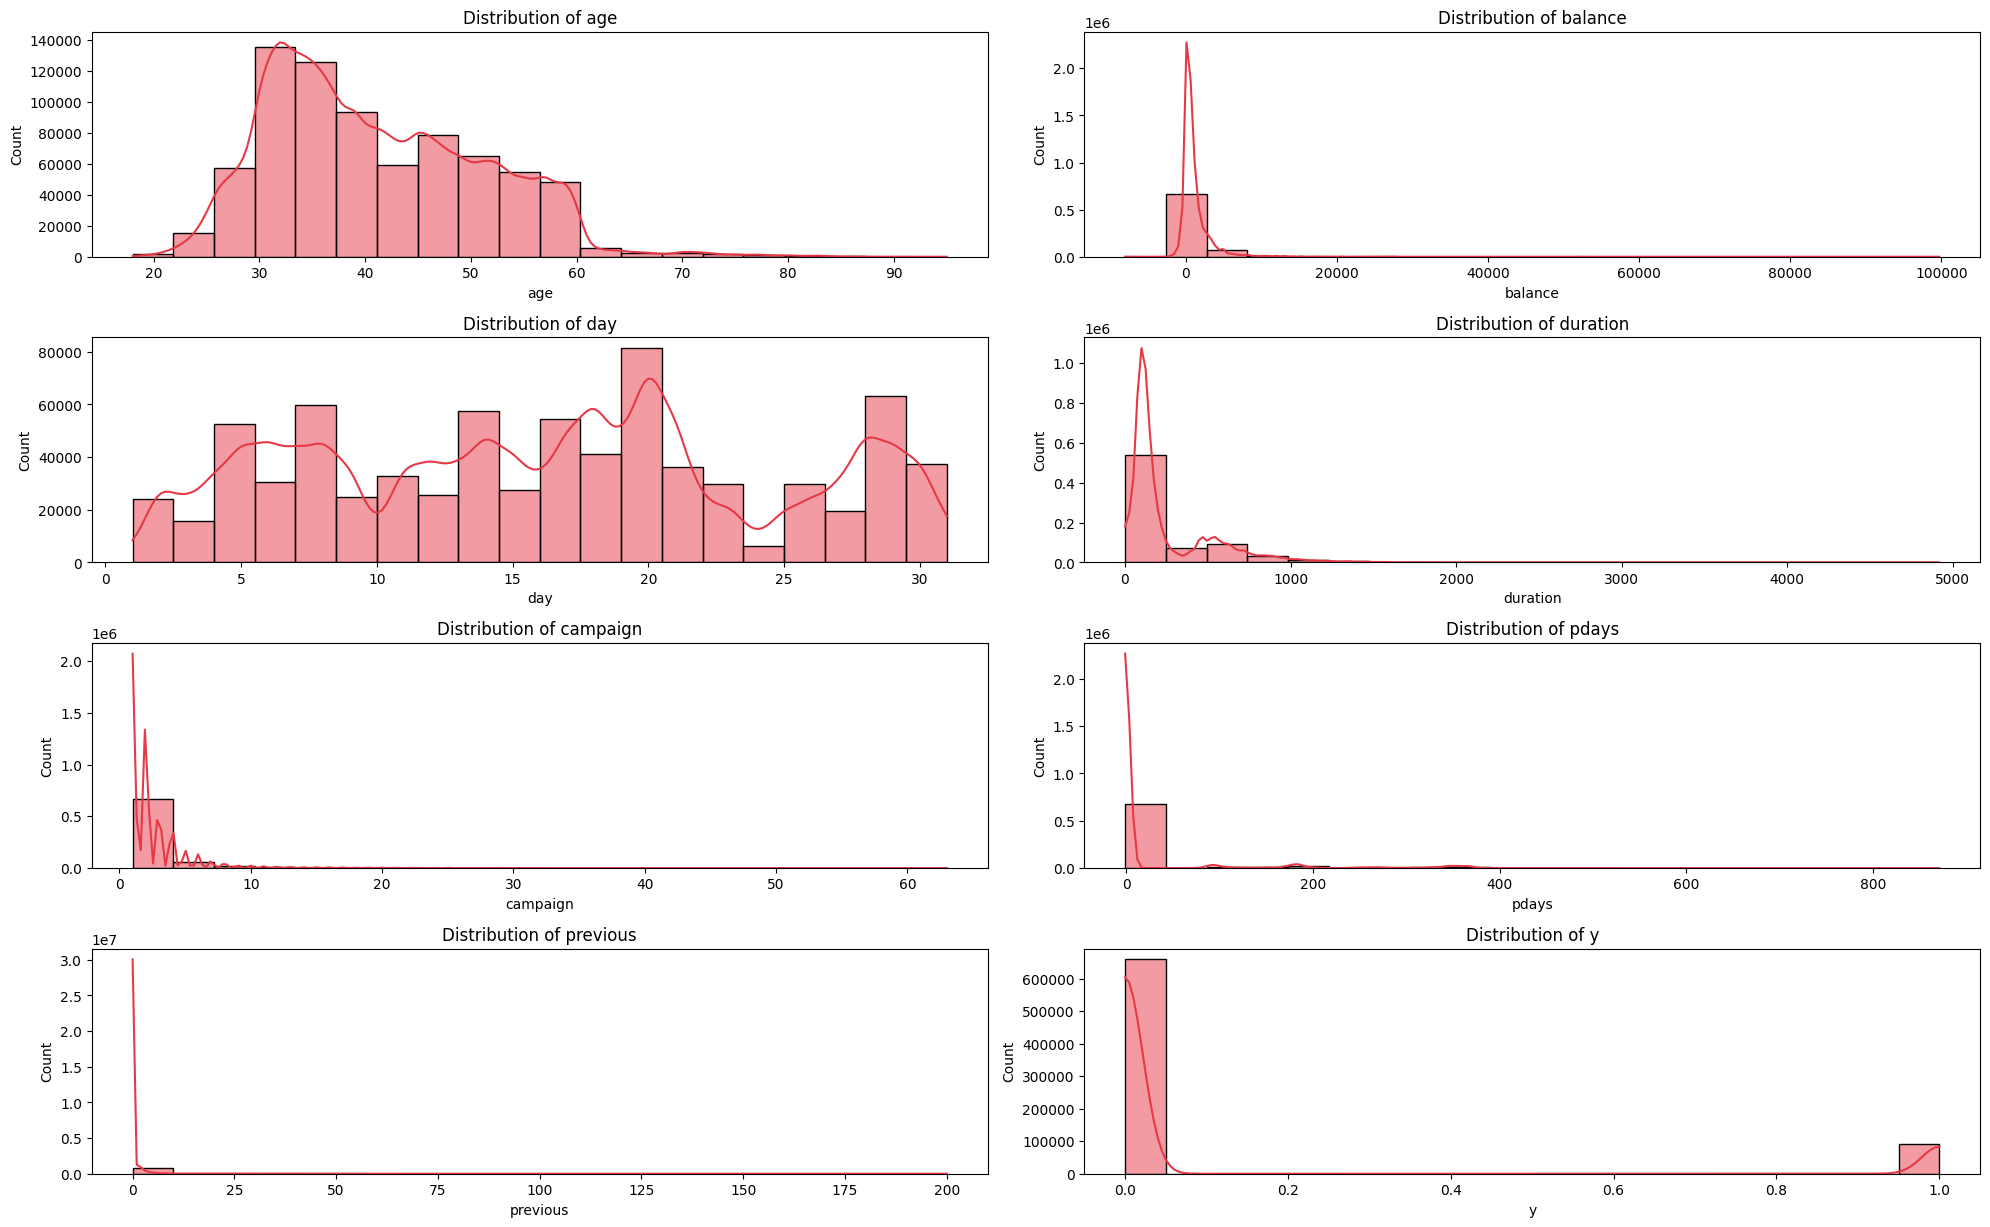

In [ ]:
plt.figure(figsize=(20,15))

for i, col in enumerate(numerical_columns):
  plt.subplot(5, 2, i+1)
  sns.histplot(df[col], bins=20, kde=True)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.tight_layout()

plt.show()

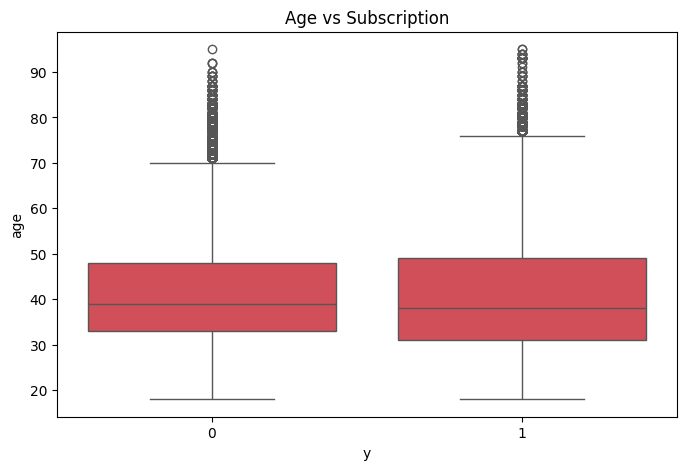

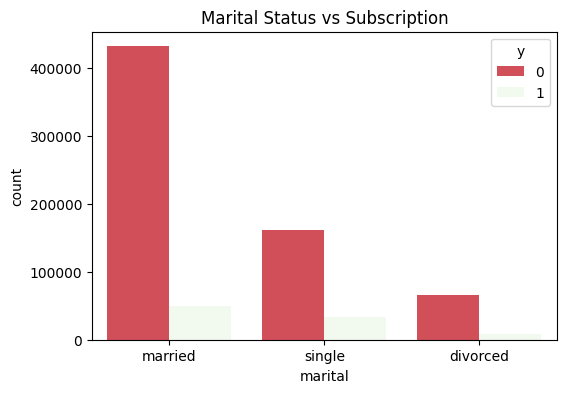

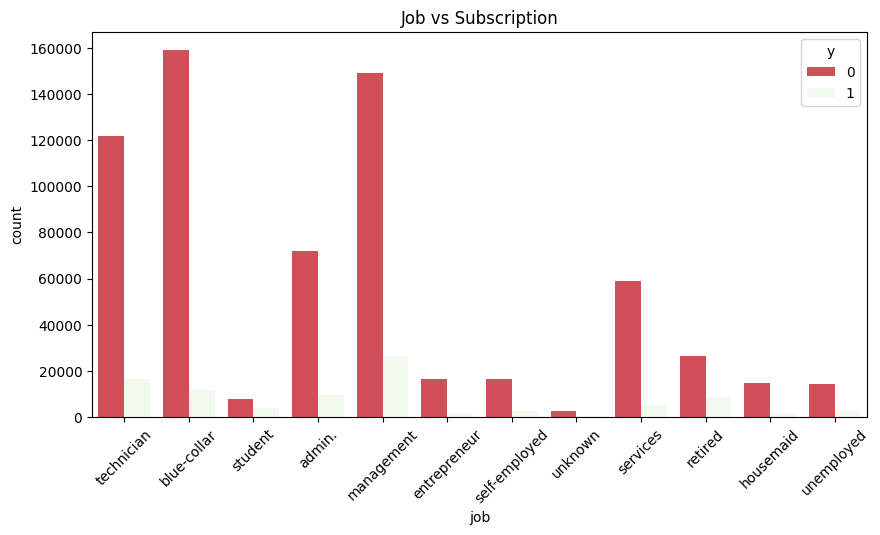

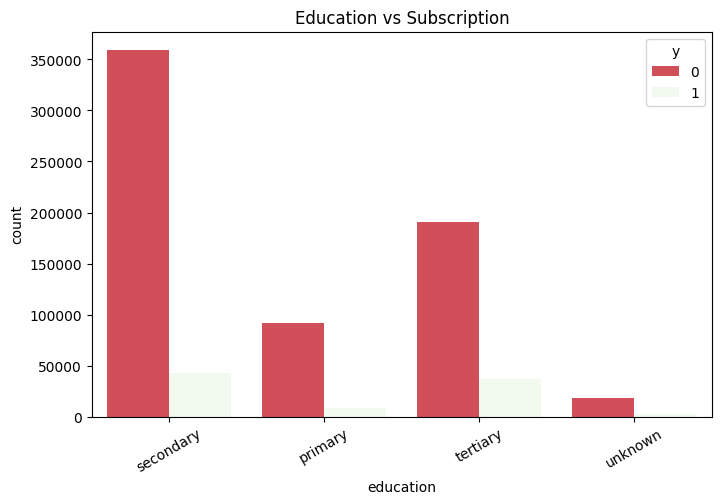

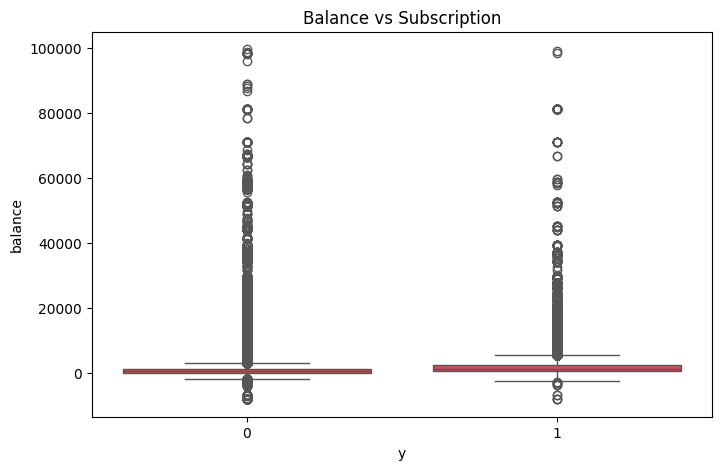

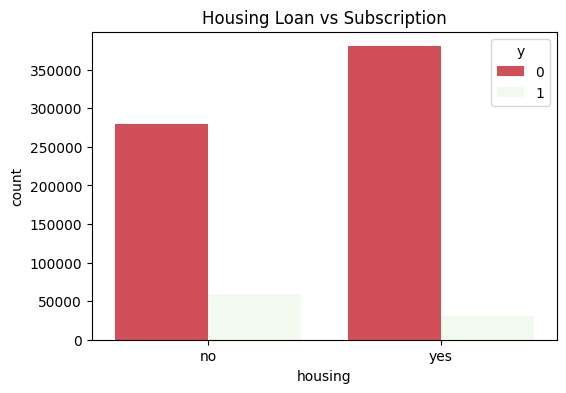

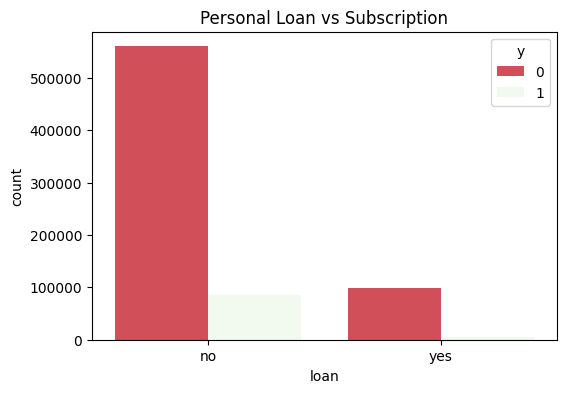

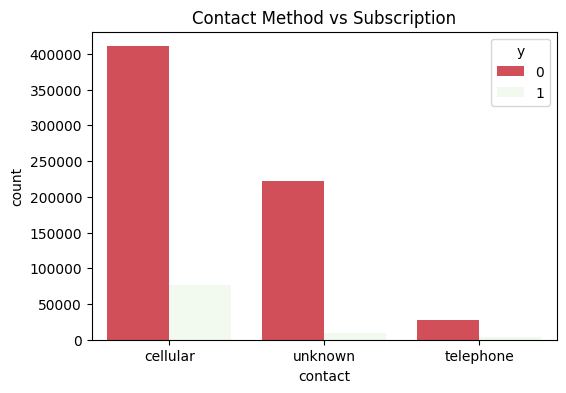

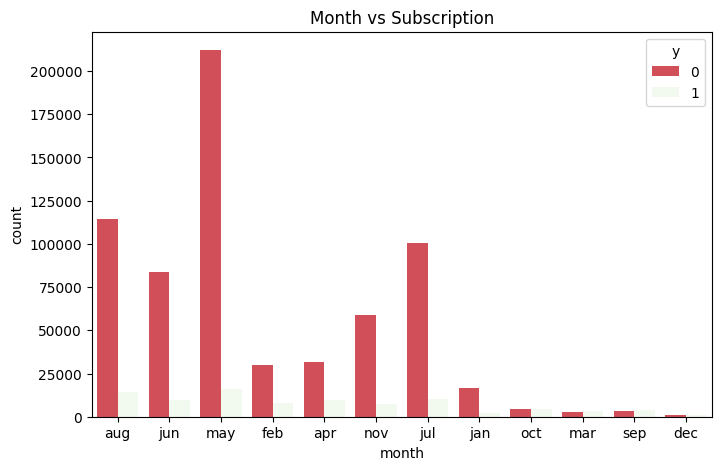

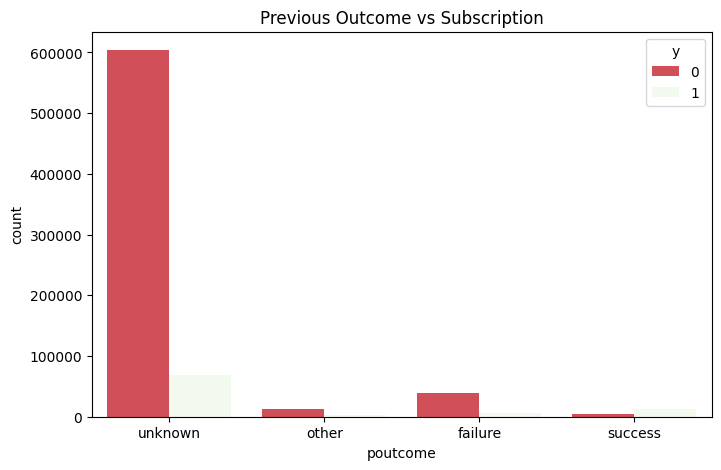

In [ ]:
# Age vs Subscription
plt.figure(figsize=(8,5))
sns.boxplot(x="y", y="age", data=df)
plt.title("Age vs Subscription")
plt.show()

# Marital status vs Subscription
plt.figure(figsize=(6,4))
sns.countplot(x="marital", hue="y", data=df)
plt.title("Marital Status vs Subscription")
plt.show()

# Job vs Subscription
plt.figure(figsize=(10,5))
sns.countplot(x="job", hue="y", data=df)
plt.title("Job vs Subscription")
plt.xticks(rotation=45)
plt.show()

# Education vs Subscription
plt.figure(figsize=(8,5))
sns.countplot(x="education", hue="y", data=df)
plt.title("Education vs Subscription")
plt.xticks(rotation=30)
plt.show()

# Balance vs Subscription
plt.figure(figsize=(8,5))
sns.boxplot(x="y", y="balance", data=df)
plt.title("Balance vs Subscription")
plt.show()

# Housing loan vs Subscription
plt.figure(figsize=(6,4))
sns.countplot(x="housing", hue="y", data=df)
plt.title("Housing Loan vs Subscription")
plt.show()

# Personal loan vs Subscription
plt.figure(figsize=(6,4))
sns.countplot(x="loan", hue="y", data=df)
plt.title("Personal Loan vs Subscription")
plt.show()

# Contact method vs Subscription
plt.figure(figsize=(6,4))
sns.countplot(x="contact", hue="y", data=df)
plt.title("Contact Method vs Subscription")
plt.show()

# Month vs Subscription
plt.figure(figsize=(8,5))
sns.countplot(x="month", hue="y", data=df)
plt.title("Month vs Subscription")
plt.show()

# Previous outcome vs Subscription
plt.figure(figsize=(8,5))
sns.countplot(x="poutcome", hue="y", data=df)
plt.title("Previous Outcome vs Subscription")
plt.show()


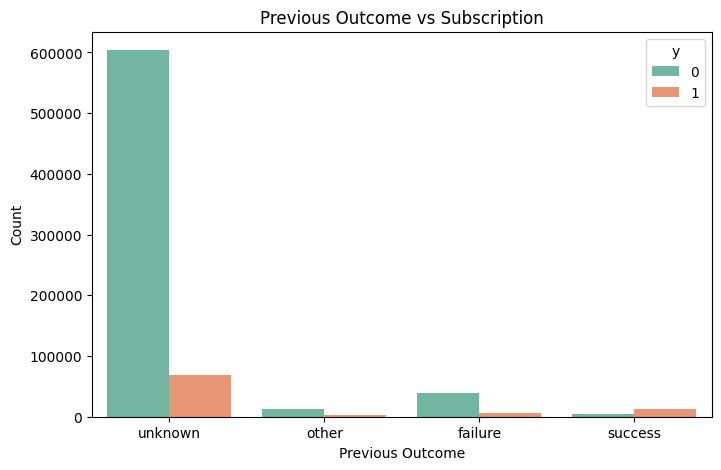

Explanation: This chart shows how the outcome of the previous marketing campaign influences subscription.


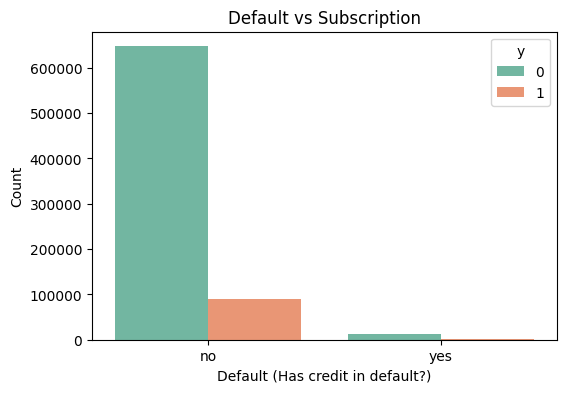

Explanation: This chart shows whether having credit in default affects the likelihood of subscription.


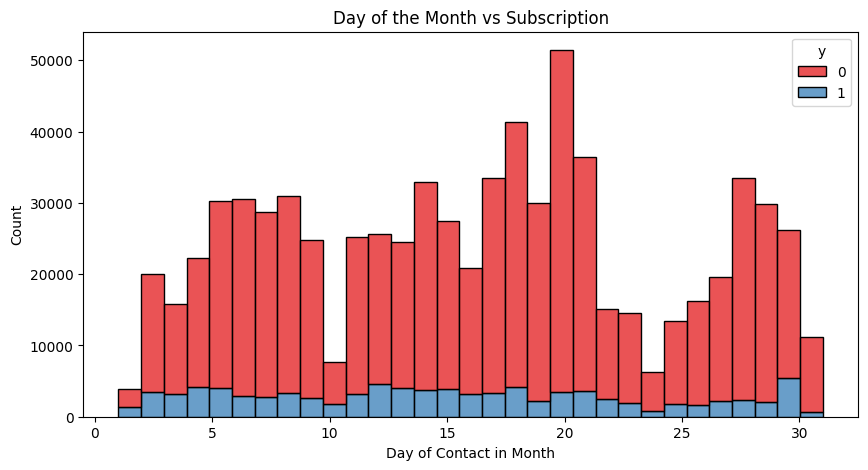

Explanation: This chart shows how the day of the month when contact was made influences subscription.


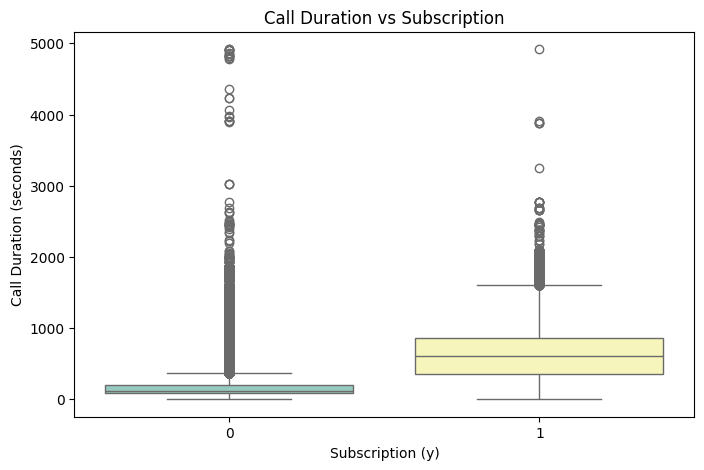

Explanation: This chart shows that longer call durations are usually linked to higher subscription rates.


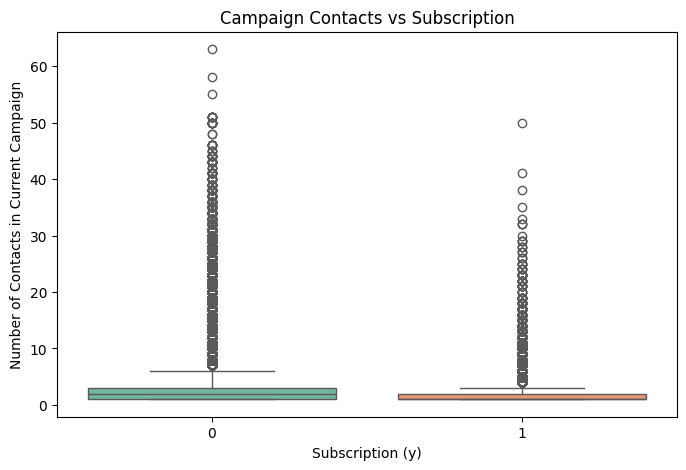

Explanation: This chart shows whether the number of contacts in the current campaign influences subscription.


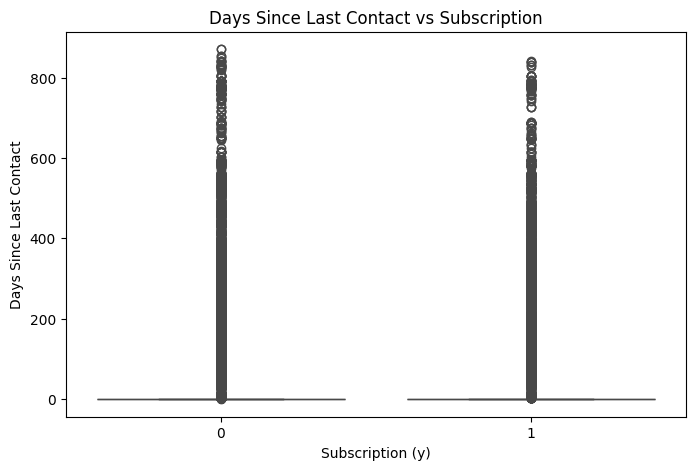

Explanation: This chart shows how the time since the last contact (pdays) is related to subscription probability.


In [ ]:


# Poutcome vs Subscription
plt.figure(figsize=(8,5))
sns.countplot(x="poutcome", hue="y", data=df, palette="Set2")
plt.title("Previous Outcome vs Subscription")
plt.xlabel("Previous Outcome")
plt.ylabel("Count")
plt.show()
print("Explanation: This chart shows how the outcome of the previous marketing campaign influences subscription.")

# Default vs Subscription
plt.figure(figsize=(6,4))
sns.countplot(x="default", hue="y", data=df, palette="Set2")
plt.title("Default vs Subscription")
plt.xlabel("Default (Has credit in default?)")
plt.ylabel("Count")
plt.show()
print("Explanation: This chart shows whether having credit in default affects the likelihood of subscription.")

# Day vs Subscription
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="day", hue="y", multiple="stack", bins=31, palette="Set1")
plt.title("Day of the Month vs Subscription")
plt.xlabel("Day of Contact in Month")
plt.ylabel("Count")
plt.show()
print("Explanation: This chart shows how the day of the month when contact was made influences subscription.")

# Duration vs Subscription
plt.figure(figsize=(8,5))
sns.boxplot(x="y", y="duration", data=df, palette="Set3")
plt.title("Call Duration vs Subscription")
plt.xlabel("Subscription (y)")
plt.ylabel("Call Duration (seconds)")
plt.show()
print("Explanation: This chart shows that longer call durations are usually linked to higher subscription rates.")

# Campaign vs Subscription
plt.figure(figsize=(8,5))
sns.boxplot(x="y", y="campaign", data=df, palette="Set2")
plt.title("Campaign Contacts vs Subscription")
plt.xlabel("Subscription (y)")
plt.ylabel("Number of Contacts in Current Campaign")
plt.show()
print("Explanation: This chart shows whether the number of contacts in the current campaign influences subscription.")

# Pdays vs Subscription
plt.figure(figsize=(8,5))
sns.boxplot(x="y", y="pdays", data=df, palette="Set1")
plt.title("Days Since Last Contact vs Subscription")
plt.xlabel("Subscription (y)")
plt.ylabel("Days Since Last Contact")
plt.show()
print("Explanation: This chart shows how the time since the last contact (pdays) is related to subscription probability.")



Check correlation between numerical columns

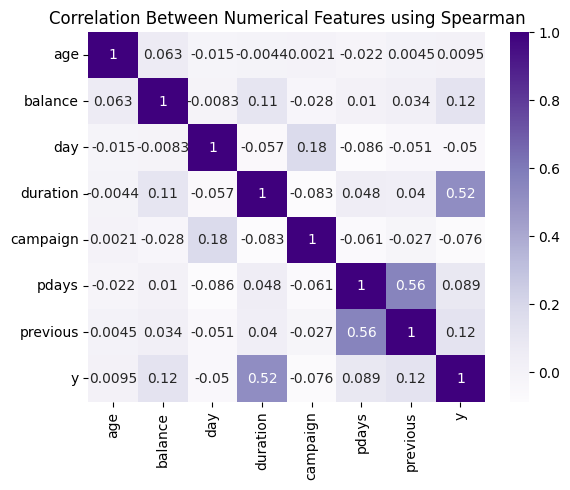

In [ ]:
num_corr = df[numerical_columns].corr(method='pearson')

sns.heatmap(num_corr, annot=True, cmap='Purples')
plt.title("Correlation Between Numerical Features using Spearman")
plt.show()

Correlation between categorical columns

In [ ]:
def cramers_v(x, y):

    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)

    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


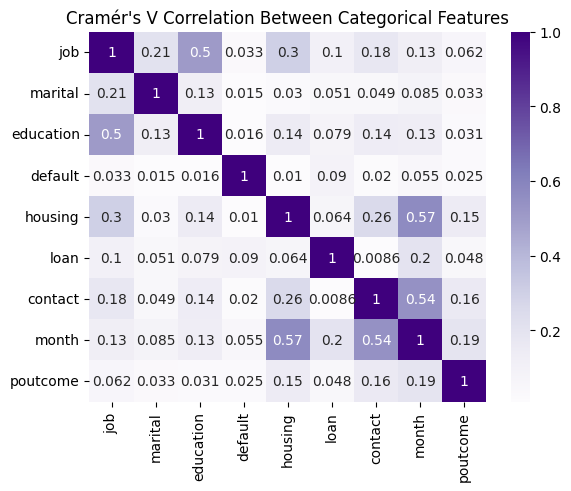

In [ ]:
cramers_results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to float for heatmap
cramers_results = cramers_results.astype(float)

sns.heatmap(cramers_results, annot=True, cmap="Purples")
plt.title("Cramér's V Correlation Between Categorical Features")
plt.show()

# `Feature engineering `

Transform categorical columns into numerical

In [ ]:
Categorical_transformer =OneHotEncoder(handle_unknown="ignore")

Apply standardization into numerical columns

In [ ]:
numeric_transformer = StandardScaler()

Split Data into features and target

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

In [ ]:
categorical_columns_after_split = categorical_columns
categorical_columns_after_split


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

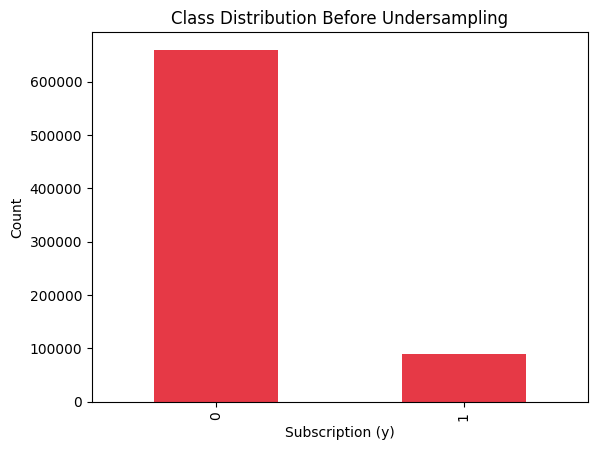

In [ ]:

df['y'].value_counts().plot(kind='bar')
plt.title("Class Distribution Before Undersampling")
plt.xlabel("Subscription (y)")
plt.ylabel("Count")
plt.show()


## Undersampling

In [ ]:

print("Class distribution before undersampling:")
print(df['y'].value_counts())

print("\nPercentage distribution before undersampling:")
print((df['y'].value_counts(normalize=True) * 100).round(2))


Class distribution before undersampling:
y
0    659512
1     90488
Name: count, dtype: int64

Percentage distribution before undersampling:
y
0   87.93
1   12.07
Name: proportion, dtype: float64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = undersample.fit_resample(X, y)

print("Class distribution after undersampling:")
print(y_resampled.value_counts())

print("\nPercentage distribution after undersampling:")
print((y_resampled.value_counts(normalize=True) * 100).round(2))


Class distribution after undersampling:
y
0    90488
1    90488
Name: count, dtype: int64

Percentage distribution after undersampling:
y
0   50.00
1   50.00
Name: proportion, dtype: float64


In [ ]:
print("Before undersampling:", X.shape, y.shape)
print("After undersampling:", X_resampled.shape, y_resampled.shape)


Before undersampling: (750000, 16) (750000,)
After undersampling: (180976, 16) (180976,)


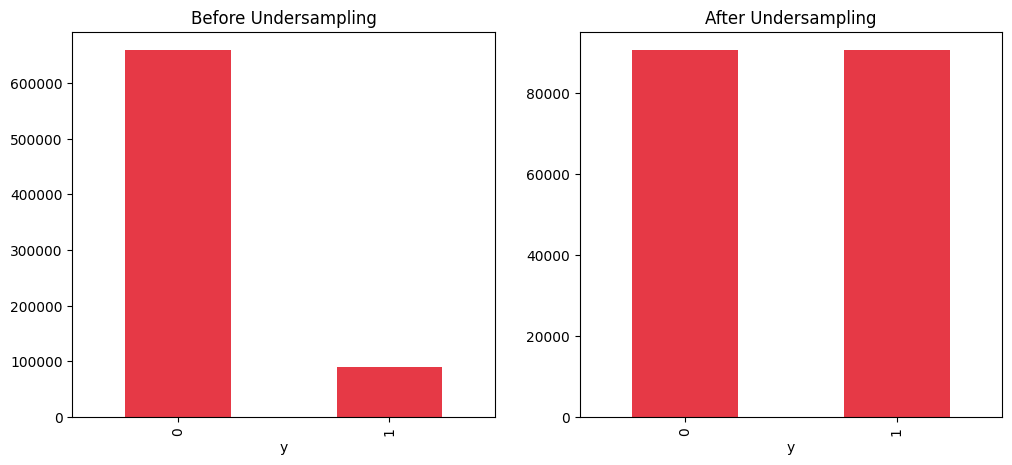

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12,5))
y.value_counts().plot(kind='bar', ax=axs[0], title="Before Undersampling")
y_resampled.value_counts().plot(kind='bar', ax=axs[1], title="After Undersampling")

plt.show()


In [ ]:
x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print('Train set size:', len(x_train_resampled), '\nTest set size:', len(x_test_resampled))

Train set size: 144780 
Test set size: 36196


In [ ]:
from sklearn.compose import ColumnTransformer
numerical_features = X_resampled.select_dtypes(include=['int64', 'float64']).columns.drop('id', errors='ignore') # Exclude 'id' as it's not a feature
categorical_features = X_resampled.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
x_train_scaled = preprocessor.fit_transform(x_train_resampled)
x_test_scaled = preprocessor.transform(x_test_resampled)

print("Shape of x_train after preprocessing:", x_train_scaled.shape)
print("Shape of x_test after preprocessing:", x_test_scaled.shape)

Shape of x_train after preprocessing: (144780, 51)
Shape of x_test after preprocessing: (36196, 51)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 97.3+ MB


# `Models `

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(x_train_scaled, y_train_resampled)
y_train_pred = logistic_model.predict(x_train_scaled)
y_test_pred = logistic_model.predict(x_test_scaled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test_resampled, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
test_classification_report = classification_report(y_test_resampled, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test_resampled, y_test_pred)

print("\nLogistic Regression Test Performance:")
print("Classification Report:\n", test_classification_report)
print("Confusion Matrix:\n", test_confusion_matrix)

Training Accuracy: 0.8729
Testing Accuracy: 0.8720

Logistic Regression Test Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     17927
           1       0.87      0.88      0.87     18269

    accuracy                           0.87     36196
   macro avg       0.87      0.87      0.87     36196
weighted avg       0.87      0.87      0.87     36196

Confusion Matrix:
 [[15558  2369]
 [ 2264 16005]]


# KNN





In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

print("Training KNN model...")
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train_resampled)
end_time = time.time()
print(f"Training finished in {end_time - start_time:.2f} seconds.")
y_train_pred = knn_model.predict(x_train_scaled)
y_test_pred = knn_model.predict(x_test_scaled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test_resampled, y_test_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

test_classification_report = classification_report(y_test_resampled, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test_resampled, y_test_pred)

print("\nKNN Test Performance:")
print("Classification Report:\n", test_classification_report)
print("Confusion Matrix:\n", test_confusion_matrix)

Training KNN model...
Training finished in 0.02 seconds.

Training Accuracy: 0.9056
Testing Accuracy: 0.8721

KNN Test Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     17927
           1       0.86      0.89      0.87     18269

    accuracy                           0.87     36196
   macro avg       0.87      0.87      0.87     36196
weighted avg       0.87      0.87      0.87     36196

Confusion Matrix:
 [[15375  2552]
 [ 2076 16193]]


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
print("Training Decision Tree model...")
start_time = time.time()

decision_tree_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=50,
    min_samples_leaf=20
)

decision_tree_model.fit(x_train_scaled, y_train_resampled)
end_time = time.time()
print(f"Training finished in {end_time - start_time:.2f} seconds.")

y_train_pred = decision_tree_model.predict(x_train_scaled)
y_test_pred = decision_tree_model.predict(x_test_scaled)


train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test_resampled, y_test_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("\nDecision Tree Test Performance:")
print("Classification Report:\n", classification_report(y_test_resampled, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_resampled, y_test_pred))


Training Decision Tree model...
Training finished in 3.20 seconds.

Training Accuracy: 0.8929
Testing Accuracy: 0.8871

Decision Tree Test Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88     17927
           1       0.85      0.94      0.89     18269

    accuracy                           0.89     36196
   macro avg       0.89      0.89      0.89     36196
weighted avg       0.89      0.89      0.89     36196

Confusion Matrix:
 [[14926  3001]
 [ 1084 17185]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Define the parameter grid for Decision Tree
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  # Try different max depths, including no limit
    'min_samples_split': [2, 10, 20, 50], # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 5, 10, 20],   # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy']      # Splitting criterion
}

# Initialize the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the resampled training data
print("Performing Grid Search for Decision Tree...")
start_time = time.time()
grid_search_dt.fit(x_train_scaled, y_train_resampled)
end_time = time.time()
print(f"Grid Search finished in {end_time - start_time:.2f} seconds.")

# Print the best parameters and the best score
print("\nBest parameters found for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation accuracy:", grid_search_dt.best_score_)

# Get the best model
best_dt_model = grid_search_dt.best_estimator_

# Predict on the test data with the best model
y_test_pred_dt = best_dt_model.predict(x_test_scaled)

# Evaluate the best model on the test set
test_accuracy_dt = accuracy_score(y_test_resampled, y_test_pred_dt)
test_classification_report_dt = classification_report(y_test_resampled, y_test_pred_dt)
test_confusion_matrix_dt = confusion_matrix(y_test_resampled, y_test_pred_dt)

print(f"\nDecision Tree Test Accuracy (after Grid Search): {test_accuracy_dt:.4f}")
print("\nDecision Tree Test Performance (after Grid Search):")
print("Classification Report:\n", test_classification_report_dt)
print("Confusion Matrix:\n", test_confusion_matrix_dt)

Performing Grid Search for Decision Tree...
Fitting 3 folds for each of 160 candidates, totalling 480 fits
Grid Search finished in 559.37 seconds.

Best parameters found for Decision Tree: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 20, 'min_samples_split': 50}
Best cross-validation accuracy: 0.8888451443569553

Decision Tree Test Accuracy (after Grid Search): 0.8903

Decision Tree Test Performance (after Grid Search):
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89     17927
           1       0.87      0.92      0.89     18269

    accuracy                           0.89     36196
   macro avg       0.89      0.89      0.89     36196
weighted avg       0.89      0.89      0.89     36196

Confusion Matrix:
 [[15456  2471]
 [ 1501 16768]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
random_forest_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced'
)

print("Training Random Forest model...")
start_time = time.time()
random_forest_model.fit(x_train_scaled, y_train_resampled)
end_time = time.time()
print(f"Training finished in {end_time - start_time:.2f} seconds.")

y_train_pred = random_forest_model.predict(x_train_scaled)
y_test_pred = random_forest_model.predict(x_test_scaled)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test_resampled, y_test_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

print("\nRandom Forest Test Performance:")
print("Classification Report:\n", classification_report(y_test_resampled, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_resampled, y_test_pred))


Training Random Forest model...
Training finished in 35.65 seconds.

Training Accuracy: 0.8955
Testing Accuracy: 0.8916

Random Forest Test Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.88     17927
           1       0.86      0.94      0.90     18269

    accuracy                           0.89     36196
   macro avg       0.90      0.89      0.89     36196
weighted avg       0.90      0.89      0.89     36196

Confusion Matrix:
 [[15014  2913]
 [ 1009 17260]]


# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

svm_model = SVC(kernel='linear', random_state=42)

print("Training SVM model...")
start_time = time.time()
svm_model.fit(x_train_scaled, y_train_resampled)
end_time = time.time()
print(f"Training finished in {end_time - start_time:.2f} seconds.")

y_train_pred = svm_model.predict(x_train_scaled)
y_test_pred = svm_model.predict(x_test_scaled)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test_resampled, y_test_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
test_classification_report = classification_report(y_test_resampled, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test_resampled, y_test_pred)

print("\nSupport Vector Machine Test Performance:")
print("Classification Report:\n", test_classification_report)
print("Confusion Matrix:\n", test_confusion_matrix)

Training SVM model...
Training finished in 859.07 seconds.

Training Accuracy: 0.8409
Testing Accuracy: 0.8420

Support Vector Machine Test Performance:
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.86      0.84      2339
         1.0       0.85      0.83      0.84      2344

    accuracy                           0.84      4683
   macro avg       0.84      0.84      0.84      4683
weighted avg       0.84      0.84      0.84      4683

Confusion Matrix:
 [[2004  335]
 [ 405 1939]]


# XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
print("Training XGBoost model...")
start_time = time.time()
xgboost_model = XGBClassifier(objective='binary:logistic', random_state=42)
xgboost_model.fit(x_train_scaled, y_train_resampled)
end_time = time.time()
print(f"Training finished in {end_time - start_time:.2f} seconds.")
y_train_pred = xgboost_model.predict(x_train_scaled)
y_test_pred = xgboost_model.predict(x_test_scaled)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test_resampled, y_test_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

test_classification_report = classification_report(y_test_resampled, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test_resampled, y_test_pred)

print("\nXGBoost Test Performance:")
print("Classification Report:\n", test_classification_report)
print("Confusion Matrix:\n", test_confusion_matrix)

Training XGBoost model...
Training finished in 5.18 seconds.

Training Accuracy: 0.9190
Testing Accuracy: 0.9070

XGBoost Test Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     17927
           1       0.89      0.94      0.91     18269

    accuracy                           0.91     36196
   macro avg       0.91      0.91      0.91     36196
weighted avg       0.91      0.91      0.91     36196

Confusion Matrix:
 [[15711  2216]
 [ 1149 17120]]


# Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("Training Neural Network model...")
start_time = time.time()
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train_scaled, y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

end_time = time.time()
print(f"Training finished in {end_time - start_time:.2f} seconds.")
loss, test_accuracy = model.evaluate(x_test_scaled, y_test_resampled, verbose=0)
print(f"\nTesting Accuracy: {test_accuracy:.4f}")

y_test_pred_proba = model.predict(x_test_scaled)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

print("\nNeural Network Test Performance:")
print("Classification Report:\n", classification_report(y_test_resampled, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_resampled, y_test_pred))


Training Neural Network model...
Epoch 1/50
3620/3620 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8503 - loss: 0.3574 - val_accuracy: 0.8918 - val_loss: 0.2643
Epoch 2/50
3620/3620 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8797 - loss: 0.2947 - val_accuracy: 0.8941 - val_loss: 0.2583
Epoch 3/50
3620/3620 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8870 - loss: 0.2788 - val_accuracy: 0.8956 - val_loss: 0.2554
Epoch 4/50
3620/3620 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8884 - loss: 0.2754 - val_accuracy: 0.8959 - val_loss: 0.2543
Epoch 5/50
3620/3620 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8878 - loss: 0.2761 - val_accuracy: 0.8975 - val_loss: 0.2521
Epoch 6/50
3620/3620 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8883 - loss: 0.2724 - val_accuracy: 0.8976 - val_loss: 0.2493
Epoch 7/50
3620/3620 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8889 - loss: 0.2730 - val_accuracy: 0.8983 - val_loss: 0.2499
Epoch 8/50
3620/3620 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/

# CatBoost

In [ ]:
!pip install catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

print("Training CatBoost model...")
start_time = time.time()

categorical_feature_names = X_resampled.select_dtypes(include=['object']).columns.tolist()

catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(x_train_resampled, y_train_resampled, cat_features=categorical_feature_names)

end_time = time.time()
print(f"Training finished in {end_time - start_time:.2f} seconds.")

y_train_pred = catboost_model.predict(x_train_resampled)
y_test_pred = catboost_model.predict(x_test_resampled)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test_resampled, y_test_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

test_classification_report = classification_report(y_test_resampled, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test_resampled, y_test_pred)

print("\nCatBoost Test Performance:")
print("Classification Report:\n", test_classification_report)
print("Confusion Matrix:\n", test_confusion_matrix)

Training CatBoost model...
Training finished in 280.19 seconds.

Training Accuracy: 0.9152
Testing Accuracy: 0.9081

CatBoost Test Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90     17927
           1       0.89      0.94      0.91     18269

    accuracy                           0.91     36196
   macro avg       0.91      0.91      0.91     36196
weighted avg       0.91      0.91      0.91     36196

Confusion Matrix:
 [[15754  2173]
 [ 1154 17115]]


# Deployment

In [ ]:
import joblib
joblib.dump(preprocessor, "preprocessor.pkl")
joblib.dump(xgboost_model, "xgboost_model.pkl")

['xgboost_model.pkl']

In [ ]:
import pandas as pd
import joblib
import gradio as gr

model = joblib.load("xgboost_model.pkl")
preprocessor = joblib.load("preprocessor.pkl")

def predict(age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome):
    try:
        features = {
            "age": int(age),
            "job": job,
            "marital": marital,
            "education": education,
            "default": default,
            "balance": float(balance),
            "housing": housing,
            "loan": loan,
            "contact": contact,
            "day": int(day),
            "month": month,
            "duration": int(duration),
            "campaign": int(campaign),
            "pdays": int(pdays),
            "previous": int(previous),
            "poutcome": poutcome
        }
        data = pd.DataFrame([features])

        data_processed = preprocessor.transform(data)

        prediction = model.predict(data_processed)[0]

        try:
            probability = model.predict_proba(data_processed)[0][1] * 100
            result = f"Predicted class: {prediction} (Probability: {probability:.2f}%)"
        except:
            result = f"Predicted class: {prediction}"

        return result

    except Exception as e:
        return f"❌ Error: {str(e)}"

# 4️⃣ واجهة Gradio
inputs = [
    gr.Slider(minimum=int(df['age'].min()), maximum=int(df['age'].max()), value=int(df['age'].mean()), label="Age"),
    gr.Dropdown(choices=df['job'].dropna().unique().tolist(), label="Job"),
    gr.Dropdown(choices=df['marital'].dropna().unique().tolist(), label="Marital Status"),
    gr.Dropdown(choices=df['education'].dropna().unique().tolist(), label="Education"),
    gr.Dropdown(choices=df['default'].dropna().unique().tolist(), label="Default"),
    gr.Slider(minimum=float(df['balance'].min()), maximum=float(df['balance'].max()), value=float(df['balance'].mean()), step=0.1, label="Balance"),
    gr.Dropdown(choices=df['housing'].dropna().unique().tolist(), label="Housing Loan"),
    gr.Dropdown(choices=df['loan'].dropna().unique().tolist(), label="Personal Loan"),
    gr.Dropdown(choices=df['contact'].dropna().unique().tolist(), label="Contact Method"),
    gr.Slider(minimum=int(df['day'].min()), maximum=int(df['day'].max()), value=int(df['day'].mean()), step=1, label="Day"),
    gr.Dropdown(choices=df['month'].dropna().unique().tolist(), label="Month"),
    gr.Slider(minimum=int(df['duration'].min()), maximum=int(df['duration'].max()), value=int(df['duration'].mean()), step=1, label="Duration"),
    gr.Slider(minimum=int(df['campaign'].min()), maximum=int(df['campaign'].max()), value=int(df['campaign'].mean()), step=1, label="Campaign"),
    gr.Slider(minimum=int(df['pdays'].min()), maximum=int(df['pdays'].max()), value=int(df['pdays'].mean()), step=1, label="Pdays"),
    gr.Slider(minimum=int(df['previous'].min()), maximum=int(df['previous'].max()), value=int(df['previous'].mean()), step=1, label="Previous"),
    gr.Dropdown(choices=df['poutcome'].dropna().unique().tolist(), label="Poutcome")
]

output = gr.Textbox(label="Prediction Result", lines=2)

app = gr.Interface(
    fn=predict,
    inputs=inputs,
    outputs=output,
    title="🧠 Bank Marketing Prediction",
    description="Predict whether a customer will subscribe to a term deposit based on their information."
)

app.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://77fbfe0de5f6cba74e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
